#### Necessary libraries

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Getting the case ready

#### Loading the data set

In [2]:
df = pd.read_csv('open_contrib/googleplaystore.csv')
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 8.3 MB


In [3]:
df.columns           #  <- retrieves all column names
df.index             #  <- retrieves all index values
df.values            #  <- retrieves main body of df
df.dtypes            #  <- retrieves datatype of each column

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### Question 1: Renaming the columns

In [4]:
df.rename(columns={'Content Rating': 'ContentRating',
                  'Last Updated': 'LastUpdated',
                  'Current Ver': 'CurrentVer',
                  'Android Ver': 'AndroidVer'}, inplace=True)
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'ContentRating', 'Genres', 'LastUpdated', 'CurrentVer',
       'AndroidVer'],
      dtype='object')

#### Data cleaning

In [5]:
# Fetching the entity which has string
df.Reviews[df.Reviews.str.contains('[^0-9]')]

10472    3.0M
Name: Reviews, dtype: object

In [6]:
df.Size[df.Size.str.contains('[^0-9]')].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [7]:
df.Installs[df.Installs.str.contains('[a-z]')]

10472    Free
Name: Installs, dtype: object

In [8]:
df.Price[df.Price.str.contains('[a-z]')]

10472    Everyone
Name: Price, dtype: object

In [9]:
# Dropping row 10472
df.drop(10472, inplace=True)

In [10]:
# Changing the datatype of Reviews column back to numeric
df.Reviews = df.Reviews.astype(int)

In [11]:
df.loc[5:10, 'Installs']

5        50,000+
6        50,000+
7     1,000,000+
8     1,000,000+
9        10,000+
10    1,000,000+
Name: Installs, dtype: object

In [12]:
df.iloc[1832:1839, 7]

1832    $1.99
1833    $4.99
1834    $4.99
1835    $4.99
1836    $5.99
1837    $6.99
1838    $9.99
Name: Price, dtype: object

In [13]:
df.Installs = df.Installs.str.replace(',','')   # Replacing ',' with ''
df.Installs.head()

0       10000+
1      500000+
2     5000000+
3    50000000+
4      100000+
Name: Installs, dtype: object

In [14]:
df.Installs = df.Installs.str.replace('+','').astype(int) #Replacing '+' with '' and converting datatype back to numeric
df.Installs.head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int32

In [15]:
df.Price = df.Price.str.lstrip('$').astype(np.float32)
df.iloc[1832:1839, 7]

1832    1.99
1833    4.99
1834    4.99
1835    4.99
1836    5.99
1837    6.99
1838    9.99
Name: Price, dtype: float32

#### Question 2 - Reformatting Size column

In [16]:
m = {'k': 3, 'M': 6}
df.Size = [int(float(i[:-1]) * 10 ** m[i[-1]]) if i != 'Varies with device' else i for i in df.Size]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
App              10840 non-null object
Category         10840 non-null object
Rating           9366 non-null float64
Reviews          10840 non-null int32
Size             10840 non-null object
Installs         10840 non-null int32
Type             10839 non-null object
Price            10840 non-null float32
ContentRating    10840 non-null object
Genres           10840 non-null object
LastUpdated      10840 non-null object
CurrentVer       10832 non-null object
AndroidVer       10838 non-null object
dtypes: float32(1), float64(1), int32(2), object(9)
memory usage: 1.3+ MB


#### Dealing with missing values

In [18]:
actual_values = df.count()
total_values = df.shape[0]
miss_perct = np.round((1 - (actual_values/total_values)) * 100, 2)
miss_perct

App               0.00
Category          0.00
Rating           13.60
Reviews           0.00
Size              0.00
Installs          0.00
Type              0.01
Price             0.00
ContentRating     0.00
Genres            0.00
LastUpdated       0.00
CurrentVer        0.07
AndroidVer        0.02
dtype: float64

In [19]:
type(miss_perct)

pandas.core.series.Series

#### A tryout

In [20]:
# Method 1
df_miss = pd.DataFrame(miss_perct.values, index=miss_perct.index, columns=['percent'])

# # Method 2
# df_miss = pd.DataFrame(miss_perct, columns=['percent'])

df_miss

,percent
App,0.00
Category,0.00
Rating,13.60
Reviews,0.00
Size,0.00
Installs,0.00
Type,0.01
Price,0.00
ContentRating,0.00
Genres,0.00


In [21]:
# Number of missing values per column
df_miss['miss_count'] = len(df) - df.count()
df_miss.head()

,percent,miss_count
App,0.0,0
Category,0.0,0
Rating,13.6,1474
Reviews,0.0,0
Size,0.0,0


In [22]:
df_miss.tail(8)

,percent,miss_count
Installs,0.00,0
Type,0.01,1
Price,0.00,0
ContentRating,0.00,0
Genres,0.00,0
LastUpdated,0.00,0
CurrentVer,0.07,8
AndroidVer,0.02,2


In [23]:
# Adding index values as new column to make it as tidy-dataframe for input to seaborn
df_miss = df_miss.reset_index()  # <- If you add reset_index(drop=True) then index column is dropped
df_miss.head(3)

,index,percent,miss_count
0,App,0.0,0
1,Category,0.0,0
2,Rating,13.6,1474


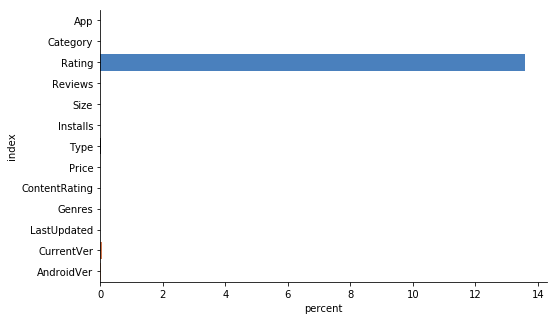

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(x="percent", y="index", data=df_miss, palette='icefire')
sns.despine()
plt.show()

In [25]:
# Filling missing values in Quantitative feature by median
for col in df.select_dtypes('float64'):
    df.loc[:, col].fillna(df.loc[:, col].median(), inplace=True)

In [26]:
# Filling missing values in Qualitative feature by mode
for col in df.select_dtypes('object'):
    df.loc[:, col].fillna(sp.stats.mode(df.loc[:, col].astype(str))[0][0], inplace=True)

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
App              10840 non-null object
Category         10840 non-null object
Rating           10840 non-null float64
Reviews          10840 non-null int32
Size             10840 non-null object
Installs         10840 non-null int32
Type             10840 non-null object
Price            10840 non-null float32
ContentRating    10840 non-null object
Genres           10840 non-null object
LastUpdated      10840 non-null object
CurrentVer       10840 non-null object
AndroidVer       10840 non-null object
dtypes: float32(1), float64(1), int32(2), object(9)
memory usage: 1.3+ MB


#### Checking duplicate entries

In [28]:
total_duplicates = len(df[df.duplicated()])
total_duplicates

483

In [29]:
print('The data has ' + str(np.round(total_duplicates/len(df) * 100, 2)) + '% of duplicate data')

The data has 4.46% of duplicate data


In [30]:
df.drop_duplicates(inplace=True)

In [31]:
print('New shape of data set: ' + str(df.shape))

New shape of data set: (10357, 13)


In [32]:
# Also let us check if duplicate entries of Apps are present or not
app_duplicates = len(df[df.App.duplicated()])
app_duplicates

698

In [33]:
print('The data has ' + str(np.round(app_duplicates/len(df) * 100, 2)) + '% of duplicate apps')

The data has 6.74% of duplicate apps


In [34]:
df = df[~df.App.duplicated()].reset_index(drop=True)
df.shape

(9659, 13)

#### Checking outliers

In [35]:
# Selecting required features and storing them into a new dataframe
df_temp = df.loc[:,['Rating', 'Reviews', 'Size', 'Installs', 'Price']]

In [36]:
# Replacing 'Varies with device' values under Size column with 0
df_temp.Size.replace('Varies with device', 0, inplace=True)

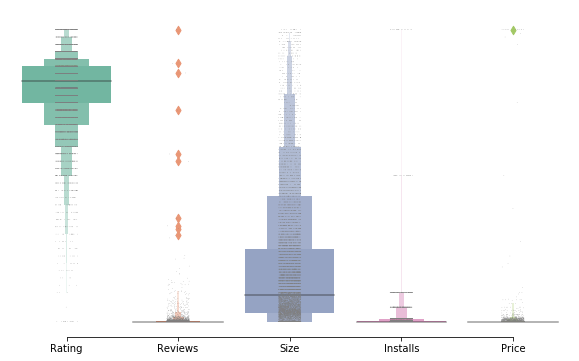

In [37]:
# Normalizing values to visualize each feature in one plot
temp = pd.melt(pd.DataFrame(MinMaxScaler().fit_transform(df_temp)))

plt.figure(figsize=(10,6))
sns.boxenplot(x='variable', y='value', data=temp, palette='Set2')
sns.stripplot(x='variable', y='value', data=temp, size=0.5, jitter=True, color="gray")
plt.xticks(np.arange(df_temp.shape[1]), df_temp.columns)
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
sns.despine(left=True,trim=True)
plt.show()

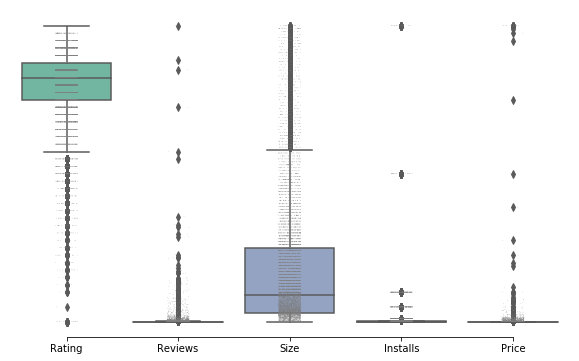

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(x='variable', y='value', data=temp, palette='Set2')
sns.stripplot(x='variable', y='value', data=temp, size=0.5, jitter=True, color="gray")
plt.xticks(np.arange(df_temp.shape[1]), df_temp.columns)
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
sns.despine(left=True,trim=True)
plt.show()

# Answering the mysteries

#### 1. Division of apps rating

In [39]:
rate = df.Rating.apply(lambda x: np.round(x * 2)/2) # Rounding to the nearest 0.5

In [40]:
# Retrieving the frequency of each unique rating
val, cnt = np.unique(rate, return_counts=True)
val, cnt

(array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 array([  17,   18,   53,  106,  298,  773, 2589, 5228,  577], dtype=int64))

In [41]:
df_rate = pd.DataFrame([val, cnt]).T
df_rate.columns = ['val', 'cnt']
df_rate

,val,cnt
0,1.0,17.0
1,1.5,18.0
2,2.0,53.0
3,2.5,106.0
4,3.0,298.0
5,3.5,773.0
6,4.0,2589.0
7,4.5,5228.0
8,5.0,577.0


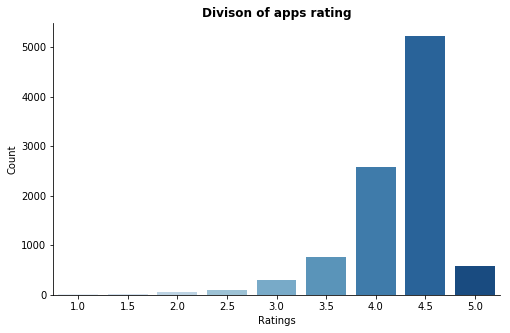

In [42]:
plt.figure(figsize=(8,5))
sns.barplot(x='val', y='cnt', data=df_rate, palette='Blues')
sns.despine()
plt.ylabel('Count')
plt.xlabel('Ratings')
plt.title('Divison of apps rating', weight='bold')
plt.show()

#### 2. Number of apps per category

In [43]:
ratio_cat_app = df.groupby('Category')['App'].count().reset_index()
ratio_cat_app.sort_values('App', ascending=False, inplace=True)

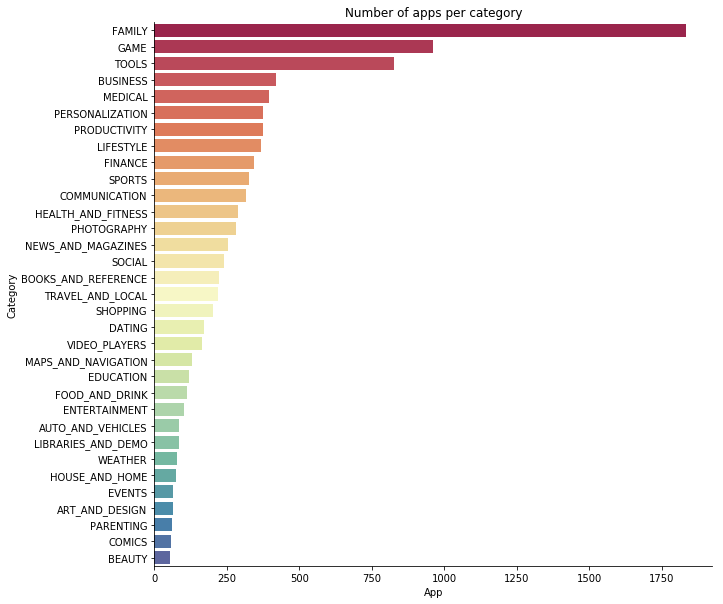

In [44]:
plt.figure(figsize=(10,10))
sns.barplot(x='App', y='Category', data=ratio_cat_app, palette='Spectral')
sns.despine()
plt.title('Number of apps per category')
plt.show()

In [48]:
df_rating_type = pd.DataFrame([rate, df.Type]).T

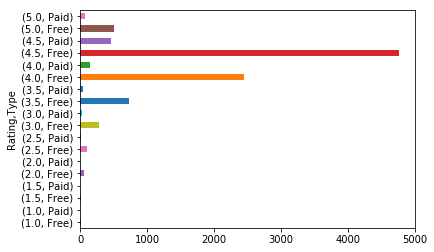

In [98]:
df_rating_type.groupby(['Rating', 'Type']).apply(lambda x: len(x)).plot.barh(stacked=True)